## Carga Inicial y Exploración de datos

In [1]:
import h5py

# Nombre del archivo
filename = "OMI-Aura_L3-OMTO3e_2005m0101_v003-2012m0409t104818.he5"

# Visualizamos la data
with h5py.File(filename, "r") as file: 
    def visitor(name, obj):
        print(name)
    file.visititems(visitor)

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/OMI Column Amount O3
HDFEOS/GRIDS/OMI Column Amount O3/Data Fields
HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/ColumnAmountO3
HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/RadiativeCloudFraction
HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/SolarZenithAngle
HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/ViewingZenithAngle
HDFEOS INFORMATION
HDFEOS INFORMATION/StructMetadata.0


In [7]:
# Path del ozono y del cloud fraction
dataset_path_ozone = "HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/ColumnAmountO3"
    
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    ozone_data = file[dataset_path_ozone][:]
    def explore(name, obj):
        if isinstance(obj, h5py.Dataset):
            print("Dataset:", name, "-> shape:", obj.shape)
    file["HDFEOS/GRIDS/OMI Column Amount O3"].visititems(explore)

Dataset: Data Fields/ColumnAmountO3 -> shape: (720, 1440)
Dataset: Data Fields/RadiativeCloudFraction -> shape: (720, 1440)
Dataset: Data Fields/SolarZenithAngle -> shape: (720, 1440)
Dataset: Data Fields/ViewingZenithAngle -> shape: (720, 1440)


## Visualización data mundial

In [8]:
# Paleta de colores custom
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (0.6, 0.0, 0.0),    # dark red
    (1.0, 0.4, 0.2),    # orange-red
    (1.0, 0.9, 0.5),    # light yellow
    (0.7, 0.9, 0.7),    # pale green
    (0.4, 0.7, 0.9),    # light blue
    (0.2, 0.4, 0.8),    # medium blue
    (0.1, 0.2, 0.4)     # dark blue
]
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
custom_cmap = custom_cmap.reversed()

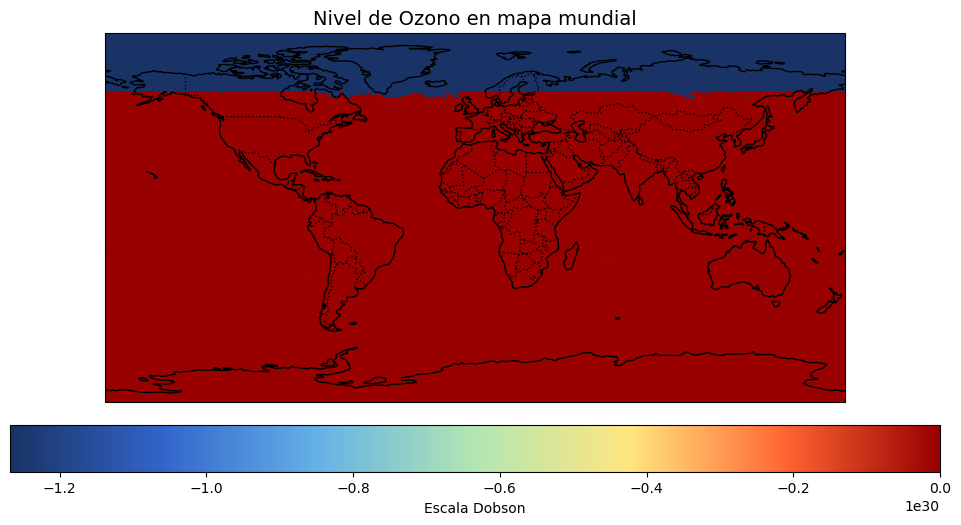

In [9]:
# Importamos algunas librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Nivel de Ozono en mapa mundial", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.set_global()

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
cb.set_label("Escala Dobson")  # Adjust based on actual units

plt.show()

In [10]:
print('Valor mínimo:', round(ozone_data.min()))
print('Valor máximo:', ozone_data.max())

Valor mínimo: -1267650600228229401496703205376
Valor máximo: 524.3


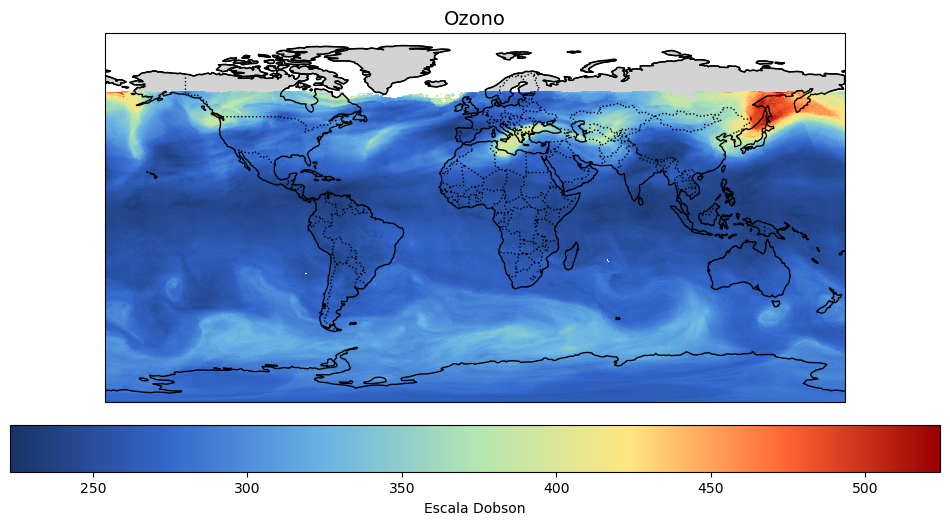

In [11]:
# Rellena valores menores a 0 como si fuera data faltante
ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Ozono", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.set_global()

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
cb.set_label("Escala Dobson")

plt.show()

## Visualización en mapa de uruguay

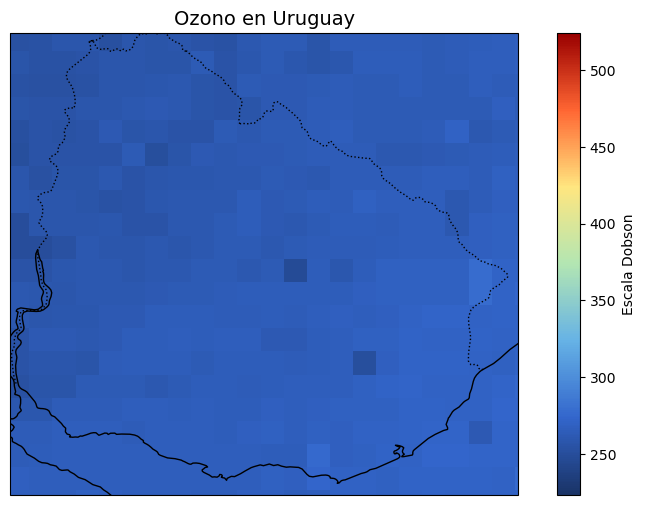

In [15]:
# Rellena valores menores a 0 como si fuera data faltante
ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Ozono en Uruguay", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

# Zoom into Uruguay
ax.set_extent([-58.5, -53.0, -35.1, -30.1], crs=ccrs.PlateCarree())

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="vertical", pad=0.05)
cb.set_label("Escala Dobson")  # Adjust based on actual units

plt.show()

## Comparación con archivo extraido manualmente

In [16]:
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    ozone = file["HDFEOS/GRIDS/OMI Column Amount O3/Data Fields/ColumnAmountO3"][:]
    
# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone.shape[0])    # Latitudes

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_idx = np.where((lons >= lon_min) & (lons <= lon_max))[0]
lat_idx = np.where((lats >= lat_min) & (lats <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]

print(ozone_subset)

[[267.7 266.2 266.4 266.4 266.2 266.5 266.5 265.9 266.1 266.6 266.6 268.
  266.8 273.1 269.  269.7 268.9 270.7 270.9 270.9 270.9 270.1]
 [263.6 265.2 266.6 266.6 265.5 265.5 266.5 266.6 266.1 266.  266.6 264.9
  264.9 275.2 267.2 268.9 271.1 269.  273.5 273.5 271.6 271.6]
 [263.8 263.8 266.2 265.6 265.6 263.8 265.8 266.1 266.1 265.2 267.1 267.9
  266.2 268.3 267.1 269.4 269.7 270.6 271.9 271.9 261.3 271.8]
 [259.3 259.3 263.7 264.1 264.1 266.1 266.1 265.  265.8 264.6 264.7 266.8
  266.5 267.5 268.8 268.8 268.5 270.4 271.  269.5 269.5 272.7]
 [253.4 256.2 256.1 262.5 263.  263.  259.7 262.6 264.8 264.8 264.  264.3
  266.3 266.4 266.1 268.2 270.9 271.4 269.5 269.2 269.2 272.1]
 [255.9 257.4 257.4 256.6 263.2 265.4 265.4 265.  262.3 264.4 265.2 265.2
  264.2 264.6 266.4 251.  267.8 270.6 270.5 270.5 269.5 268.9]
 [255.5 261.7 260.8 260.5 261.9 264.6 264.6 265.9 264.3 265.8 266.4 261.4
  261.4 265.3 266.5 268.  268.2 270.6 269.6 269.6 271.3 269.1]
 [260.2 257.8 259.2 259.2 261.5 261.1 264.

In [21]:
from netCDF4 import Dataset

nc_data = Dataset('g4.timeAvgMap.OMTO3e_003_ColumnAmountO3.20050101-20050101.58W_35S_53W_30S.nc', 'r')
ozone_data_giovanni = nc_data.variables['OMTO3e_003_ColumnAmountO3'][:, :]
print(ozone_data_giovanni)

[[267.7 266.2 266.4 266.4 266.2 266.5 266.5 265.9 266.1 266.6 266.6 268.
  266.8 273.1 269.  269.7 268.9 270.7 270.9 270.9 270.9 270.1]
 [263.6 265.2 266.6 266.6 265.5 265.5 266.5 266.6 266.1 266.  266.6 264.9
  264.9 275.2 267.2 268.9 271.1 269.  273.5 273.5 271.6 271.6]
 [263.8 263.8 266.2 265.6 265.6 263.8 265.8 266.1 266.1 265.2 267.1 267.9
  266.2 268.3 267.1 269.4 269.7 270.6 271.9 271.9 261.3 271.8]
 [259.3 259.3 263.7 264.1 264.1 266.1 266.1 265.  265.8 264.6 264.7 266.8
  266.5 267.5 268.8 268.8 268.5 270.4 271.  269.5 269.5 272.7]
 [253.4 256.2 256.1 262.5 263.  263.  259.7 262.6 264.8 264.8 264.  264.3
  266.3 266.4 266.1 268.2 270.9 271.4 269.5 269.2 269.2 272.1]
 [255.9 257.4 257.4 256.6 263.2 265.4 265.4 265.  262.3 264.4 265.2 265.2
  264.2 264.6 266.4 251.  267.8 270.6 270.5 270.5 269.5 268.9]
 [255.5 261.7 260.8 260.5 261.9 264.6 264.6 265.9 264.3 265.8 266.4 261.4
  261.4 265.3 266.5 268.  268.2 270.6 269.6 269.6 271.3 269.1]
 [260.2 257.8 259.2 259.2 261.5 261.1 264.

In [22]:
# Nice!
ozone_data_giovanni - ozone_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

## Creando pandas dataframe de los datos

In [23]:
# Referencias obtenidas del archivo particular
print(nc_data.variables['lat'][:])
print(len(nc_data.variables['lat'][:]))
print(nc_data.variables['lon'][:])
print(len(nc_data.variables['lon'][:]))

[-34.875 -34.625 -34.375 -34.125 -33.875 -33.625 -33.375 -33.125 -32.875
 -32.625 -32.375 -32.125 -31.875 -31.625 -31.375 -31.125 -30.875 -30.625
 -30.375 -30.125]
20
[-58.375 -58.125 -57.875 -57.625 -57.375 -57.125 -56.875 -56.625 -56.375
 -56.125 -55.875 -55.625 -55.375 -55.125 -54.875 -54.625 -54.375 -54.125
 -53.875 -53.625 -53.375 -53.125]
22


In [24]:
giovanni_lats = nc_data.variables['lat'][:]
giovanni_lons = nc_data.variables['lon'][:]

for lat in range(len(giovanni_lats)):
    for lon in range(len(giovanni_lons)):
        print(giovanni_lats[lat],giovanni_lons[lon], ozone_data_giovanni[lat, lon])

-34.875 -58.375 267.7
-34.875 -58.125 266.2
-34.875 -57.875 266.4
-34.875 -57.625 266.4
-34.875 -57.375 266.2
-34.875 -57.125 266.5
-34.875 -56.875 266.5
-34.875 -56.625 265.9
-34.875 -56.375 266.1
-34.875 -56.125 266.6
-34.875 -55.875 266.6
-34.875 -55.625 268.0
-34.875 -55.375 266.8
-34.875 -55.125 273.1
-34.875 -54.875 269.0
-34.875 -54.625 269.7
-34.875 -54.375 268.9
-34.875 -54.125 270.7
-34.875 -53.875 270.9
-34.875 -53.625 270.9
-34.875 -53.375 270.9
-34.875 -53.125 270.1
-34.625 -58.375 263.6
-34.625 -58.125 265.2
-34.625 -57.875 266.6
-34.625 -57.625 266.6
-34.625 -57.375 265.5
-34.625 -57.125 265.5
-34.625 -56.875 266.5
-34.625 -56.625 266.6
-34.625 -56.375 266.1
-34.625 -56.125 266.0
-34.625 -55.875 266.6
-34.625 -55.625 264.9
-34.625 -55.375 264.9
-34.625 -55.125 275.2
-34.625 -54.875 267.2
-34.625 -54.625 268.9
-34.625 -54.375 271.1
-34.625 -54.125 269.0
-34.625 -53.875 273.5
-34.625 -53.625 273.5
-34.625 -53.375 271.6
-34.625 -53.125 271.6
-34.375 -58.375 263.8
-34.375 -5

In [25]:
lon = np.linspace(-180, 180, ozone.shape[1]).round(3)  # Longitudes
lat = np.linspace(-90, 90, ozone.shape[0]).round(3)    # Latitudes

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_val = lon[(lon >= lon_min) & (lon <= lon_max)] 
lat_val = lat[(lat >= lat_min) & (lat <= lat_max)]

lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]

print('Lista completa de valores de latitud y longitud')
print(lat_val)
print(len(lat_val))
print(lon_val)
print(len(lon_val))

Lista completa de valores de latitud y longitud
[-34.924 -34.673 -34.423 -34.172 -33.922 -33.672 -33.421 -33.171 -32.921
 -32.67  -32.42  -32.17  -31.919 -31.669 -31.419 -31.168 -30.918 -30.668
 -30.417 -30.167]
20
[-58.416 -58.165 -57.915 -57.665 -57.415 -57.165 -56.915 -56.664 -56.414
 -56.164 -55.914 -55.664 -55.413 -55.163 -54.913 -54.663 -54.413 -54.163
 -53.912 -53.662 -53.412 -53.162]
22


In [26]:
# No logramos matchear los datos de giovanni pero nuestra data se sigue viendo bien
ozone_data_giovanni - ozone_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

In [29]:
X = []

for l_lat in lat_idx:
    for l_lon in lon_idx:
        x = []
        x.append(lat[l_lat])
        x.append(lon[l_lon])
        x.append(ozone[l_lat,l_lon])
        X.append(x)
        
X = np.asarray(X)

In [30]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Latitud', 'Longitud', 'Ozono'])

df

,Latitud,Longitud,Ozono
0,-34.924,-58.416,267.700012
1,-34.924,-58.165,266.200012
2,-34.924,-57.915,266.399994
3,-34.924,-57.665,266.399994
4,-34.924,-57.415,266.200012
...,...,...,...
435,-30.167,-54.163,264.100006
436,-30.167,-53.912,262.100006
437,-30.167,-53.662,263.700012
438,-30.167,-53.412,264.600006


In [31]:
filename.split('_')[2].replace('m','')

'20050101'

In [33]:
fecha = filename.split('_')[2].replace('m','')

df['Fecha'] = fecha

df

,Latitud,Longitud,Ozono,Fecha
0,-34.924,-58.416,267.700012,20050101
1,-34.924,-58.165,266.200012,20050101
2,-34.924,-57.915,266.399994,20050101
3,-34.924,-57.665,266.399994,20050101
4,-34.924,-57.415,266.200012,20050101
...,...,...,...,...
435,-30.167,-54.163,264.100006,20050101
436,-30.167,-53.912,262.100006,20050101
437,-30.167,-53.662,263.700012,20050101
438,-30.167,-53.412,264.600006,20050101
